# Аттестация Python

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [27]:
solar_data = pd.read_csv('data/solarpower.csv')
solar_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [28]:
solar_data[solar_data['cum_power'] == -1]

,date,cum_power
45,2017-02-15,-1.0
647,2018-10-10,-1.0


In [29]:
solar_data['cum_power'].mean()


23775.573795180724

In [30]:
solar_data.shape[0]

664

In [31]:
for i in range(solar_data.shape[0]):
    if solar_data.loc[i, 'cum_power'] == -1:
        solar_data.loc[i, 'cum_power'] = (solar_data.loc[i-1, 'cum_power']+solar_data.loc[i+1, 'cum_power'])/2
solar_data.isnull().sum()

date         0
cum_power    0
dtype: int64

In [32]:
solar_data['cum_power'].mean()

23848.246987951807

In [33]:
# Расчитаем для каждого предыдушего значения
solar_data['day_power'] = solar_data['cum_power'].diff()
display(solar_data['day_power'])

0      NaN
1      1.0
2      3.0
3      2.0
4      2.0
      ... 
659    6.0
660    8.0
661    6.0
662    2.0
663    3.0
Name: day_power, Length: 664, dtype: float64

In [34]:
solar_data['date'] = pd.to_datetime(solar_data['date'])

In [35]:
solar_data['year_month'] = solar_data['date'].dt.to_period('M')
grouped = solar_data.groupby(['year_month']).sum()
grouped.head()

,cum_power,day_power
year_month,,
2017-01,624746.0,97.0
2017-02,567197.0,104.0
2017-03,633782.0,334.0
2017-04,626551.0,489.0
2017-05,663651.0,589.0


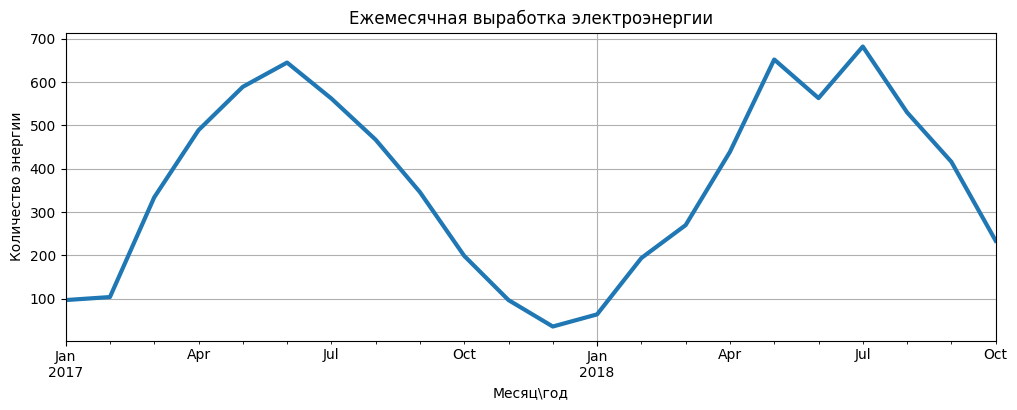

In [38]:
grouped['day_power'].plot(
    kind='line',
    figsize=(12, 4),
    title='Ежемесячная выработка электроэнергии',
    grid = True,
    lw=3,
    xlabel='Месяц\год',
    ylabel='Количество энергии'
);